In [1]:
# Autoimport on changes
%load_ext autoreload
%autoreload 2

# Import commonly used libraries
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# graphics
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# type annotation
import jaxtyping
from jaxtyping import Float32, Int64, jaxtyped
from typeguard import typechecked as typechecker

# more itertools
import more_itertools as mi

# itertools
import itertools
import collections

# tensor manipulation
from einops import rearrange, reduce, repeat

In [2]:
# note: same thing for REPL
# Enable autoreload to automatically reload modules when they change

from IPython import get_ipython

# do this so that formatter not messed up
ipython = get_ipython()
ipython.run_line_magic("load_ext", "autoreload")
ipython.run_line_magic("autoreload", "2")

# Enable jaxtyping based typechecking
import jaxtyping
import typeguard

# Inline comment: This magic command enables runtime type checking using jaxtyping and typeguard
# ipython.run_line_magic("load_ext", "jaxtyping")

# Inline comment: This sets the typecheck mode to 'jaxtyping', which allows for more precise tensor shape checking
# ipython.run_line_magic("jaxtyping.typechecker", "typeguard.typechecked")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


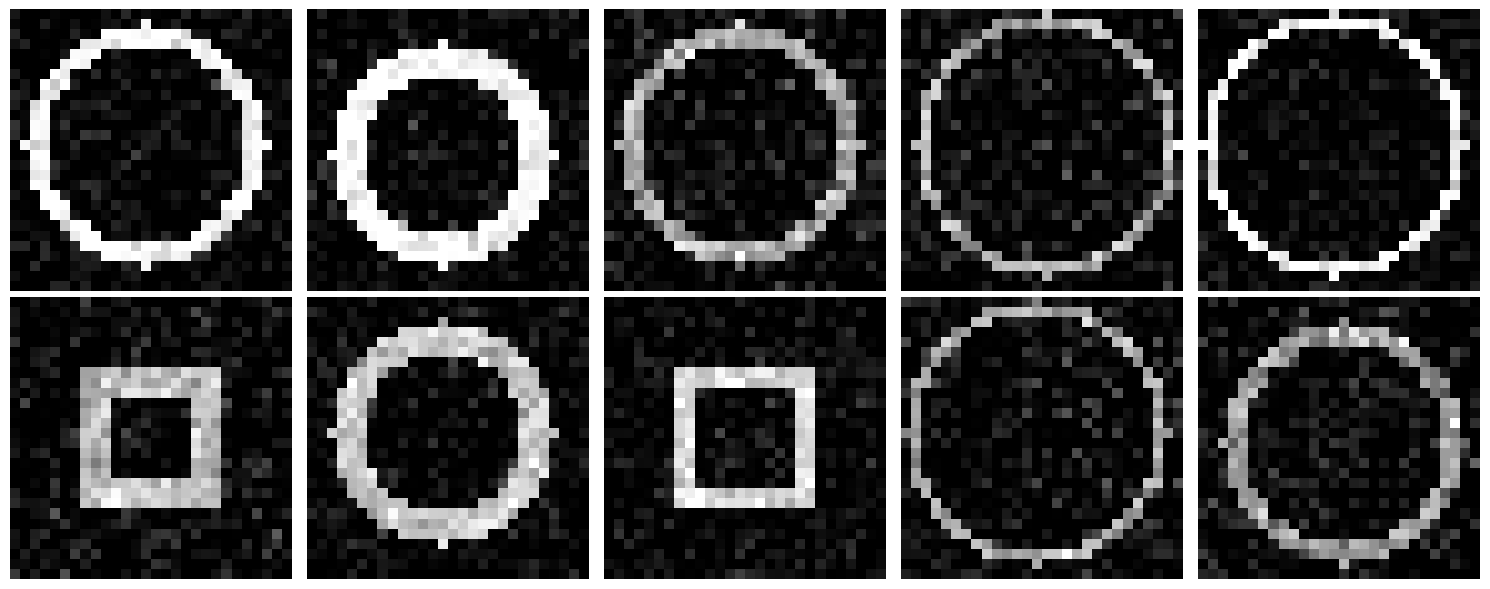

Dataset shape: (1000, 28, 28)


In [5]:
import numpy as np
import matplotlib.pyplot as plt


def generate_shape(shape_type, size=28, thickness=2):
    canvas = np.zeros((size, size))
    center = size // 2

    if shape_type == "circle":
        y, x = np.ogrid[-center : size - center, -center : size - center]
        mask = (x * x + y * y <= (center - thickness) ** 2) & (
            x * x + y * y >= (center - 2 * thickness) ** 2
        )
    elif shape_type == "square":
        mask = np.zeros((size, size), dtype=bool)
        mask[
            center - center // 2 : center + center // 2,
            center - center // 2 : center + center // 2,
        ] = True
        inner_mask = np.zeros((size, size), dtype=bool)
        inner_mask[
            center - center // 2 + thickness : center + center // 2 - thickness,
            center - center // 2 + thickness : center + center // 2 - thickness,
        ] = True
        mask = mask & ~inner_mask
    elif shape_type == "triangle":
        y, x = np.ogrid[-center : size - center, -center : size - center]
        mask = (y >= -x) & (y >= x) & (y <= center - thickness)
        inner_mask = (
            (y >= -x + thickness) & (y >= x + thickness) & (y <= center - 2 * thickness)
        )
        mask = mask & ~inner_mask

    canvas[mask] = 1
    return canvas


def add_noise(image, noise_level=0.1):
    noise = np.random.normal(0, noise_level, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)


def generate_dataset(num_samples=1000, size=28):
    shapes = ["circle", "square", "triangle"]
    dataset = []

    for _ in range(num_samples):
        shape_type = np.random.choice(shapes)
        thickness = np.random.randint(1, 4)
        shape = generate_shape(shape_type, size, thickness)

        # Random rotation
        angle = np.random.uniform(0, 360)
        shape = np.rot90(shape, k=int(angle // 90))

        # Random scaling
        scale = np.random.uniform(0.5, 1.5)
        shape = np.clip(shape * scale, 0, 1)

        # Add noise
        shape = add_noise(shape, noise_level=0.1)

        dataset.append(shape)

    return np.array(dataset)


# Generate the dataset
dataset = generate_dataset()

# Visualize a few samples
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(dataset[i], cmap="gray")
    ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Dataset shape: {dataset.shape}")


# Load the dataset (uncomment to use)
# loaded_dataset = load_dataset(file_path)

# If you want to verify the loaded dataset, you can visualize it:
# if loaded_dataset is not None:
#     fig, axes = plt.subplots(2, 5, figsize=(15, 6))
#     for i, ax in enumerate(axes.flat):
#         ax.imshow(loaded_dataset[i], cmap="gray")
#         ax.axis("off")
#     plt.tight_layout()
#     plt.show()